# Part 1: Data Preprocessing

Dataset : https://www.kaggle.com/mirichoi0218/insurance

## Import Libraries and Dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# To check the first 5 records 
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# To check the last 5 records 
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Data Exploration

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# Check the shape(row,column)
dataset.shape

(1338, 7)

In [8]:
# Display the columns
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [83]:
# Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [10]:
# Select the Datatype of object
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
# length 
len(dataset.select_dtypes(include='object').columns)

3

In [12]:
# Select the Datatype of float64 and int64
dataset.select_dtypes(include=['float64','int64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
# length 
len(dataset.select_dtypes(include=['float64','int64']).columns)

4

In [30]:
# Statistical Description
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the categorical columns using groupby()

In [14]:
# Groupby the Categorical Variable
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [15]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [16]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing data

In [17]:
# Missing data check
dataset.isnull().values.any()

False

In [18]:
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [19]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
len(dataset.select_dtypes(include='object').columns)

3

In [23]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [24]:
dataset['sex'].nunique()

2

In [26]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
dataset['smoker'].nunique()

2

In [28]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
dataset['region'].nunique()

4

In [31]:
# one hot encoding
dataset = pd.get_dummies(data=dataset,drop_first=True)

In [32]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [33]:
dataset.shape

(1338, 9)

In [34]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

## Correlation Matrix

In [35]:
# Correlation Matrix
dataset_2 = dataset.drop(columns='charges')

<AxesSubplot:title={'center':'Correlation with Charges'}>

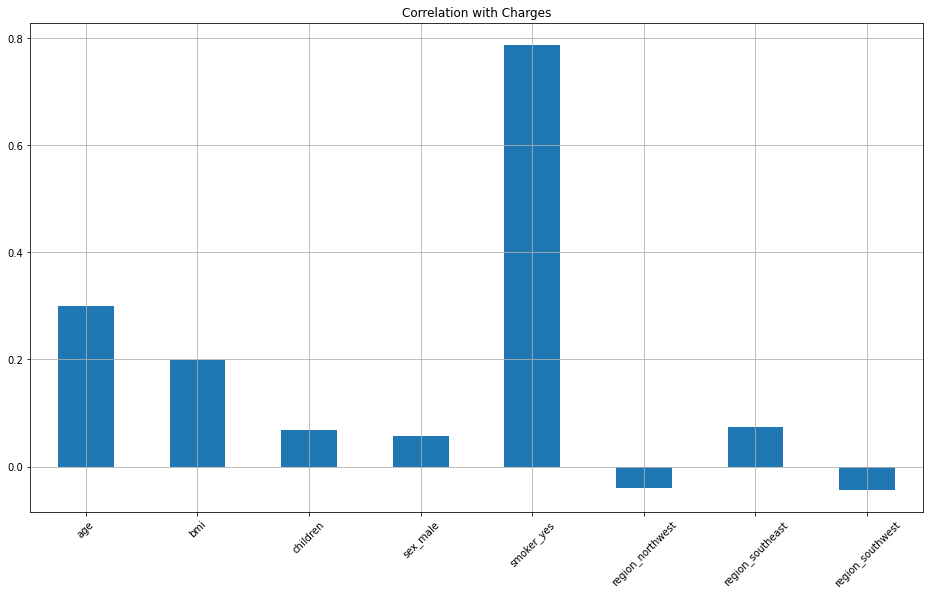

In [36]:
# Correlation Matrix Graph
dataset_2.corrwith(dataset['charges']).plot.bar(figsize=(16,9),title='Correlation with Charges',rot=45,grid=True)

In [37]:
# Correlation Heatmap
corr = dataset.corr()

<AxesSubplot:>

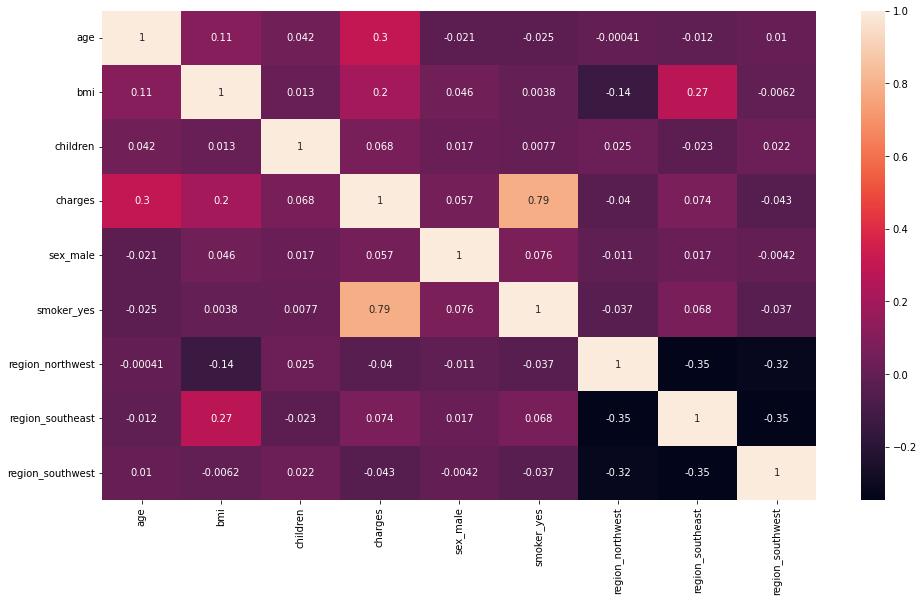

In [38]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

## Splitting the Data

In [39]:
# matrix of the independent variable
x = dataset.drop(columns='charges')

In [40]:
# matrix of the target variable
y = dataset['charges']

In [41]:
# training the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train.shape

(1070, 8)

In [43]:
y_train.shape

(1070,)

In [44]:
x_test.shape

(268, 8)

In [45]:
y_test.shape

(268,)

## Feature Scaling

In [46]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [49]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the Model

## 1) Multiple Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,y_pred)

0.7999876970680434

## 2) Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
y_pred = rf.predict(x_test)

In [56]:
r2_score(y_test,y_pred)

0.8805683219721372

## 3) XGBoost Classification

In [57]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)

[08:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [58]:
y_pred = xgb.predict(x_test)

In [60]:
r2_score(y_test,y_pred)

0.882613022028781

# Part 3: Prediction for a Single Observation

## Example 1

Name: kim, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [61]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [64]:
kim_obs=[[40,45.50,4,1,1,0,0,0]]

In [65]:
xgb.predict(sc.transform(kim_obs))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([38650.09], dtype=float32)

## Example 2

Name: Jisoo, age: 24, sex: 0, bmi:35.50, children:2, smoker:0, region:northwest

In [66]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [67]:
jisoo_obs=[[24,35.50,2,0,0,1,0,0]]

In [68]:
xgb.predict(sc.transform(jisoo_obs))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5997.8164], dtype=float32)